# Strategy Signals & Backtesting

## Preamble

Basic stuff we use everywhere.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Imports

In [11]:
import time
import requests
import json

### Helpers

In [12]:
def get_unix_time_minus_days(subtract_days):
    return int(time.time())-(86400*subtract_days)

def parse_unix_date(posix_time):
    return datetime.datetime.utcfromtimestamp(posix_time).strftime('%Y-%m-%dT%H:%M:%SZ')

def http_get(url):
    r = requests.get(url)
    data = json.loads(r.text)
    return data

## Series

### BTC_USDT: poloniex.com

For this simple example we will be using the poloniex charting API.

In [13]:
_5MIN = 300
_15MIN = 900
_30MIN = 1800
_2HR = 7200
_4HR = 14400
_DAY = 86400

In [14]:
def get_chart(pair, start, period):
    url = 'https://poloniex.com/public?command=returnChartData&currencyPair='+str(pair)+'&start='+str(start)+'&end=9999999999&period=' + str(period)
    return http_get(url)

In [102]:
data = get_chart('USDT_BTC', get_unix_time_minus_days(7), _4HR)
data[0:2]

[{'close': 16174.43357169,
  'date': 1515355200,
  'high': 16490,
  'low': 15900,
  'open': 16139.99999989,
  'quoteVolume': 654.74364027,
  'volume': 10623322.178229,
  'weightedAverage': 16225.16283449},
 {'close': 15591.21251879,
  'date': 1515369600,
  'high': 16277.49999996,
  'low': 15510,
  'open': 16170.7066618,
  'quoteVolume': 874.89004686,
  'volume': 13892046.306713,
  'weightedAverage': 15878.61966949}]

In [103]:
series = [(parse_unix_date(x['date']), float(x['open']), float(x['high']), float(x['low']), float(x['close']), float(x['volume'])) for x in data]

In [104]:
series[0]

('2018-01-07T20:00:00Z',
 16139.99999989,
 16490.0,
 15900.0,
 16174.43357169,
 10623322.178229)

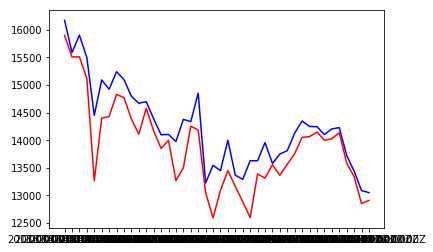

In [105]:
d, o, h, l, c, v = zip(*series)

plot(d,c,c='b');
plot(d,l,c='r');

### Simple/Exponential Moving Average

In [106]:
N = 21
weights = np.ones(N)/N
weights

array([ 0.04761905,  0.04761905,  0.04761905,  0.04761905,  0.04761905,
        0.04761905,  0.04761905,  0.04761905,  0.04761905,  0.04761905,
        0.04761905,  0.04761905,  0.04761905,  0.04761905,  0.04761905,
        0.04761905,  0.04761905,  0.04761905,  0.04761905,  0.04761905,
        0.04761905])

In [107]:
sma = np.convolve(weights, c)[N-1:-N+1]

In [108]:
weights = np.exp(np.linspace(-1.,0.,N))
weights /= weights.sum()
weights

array([ 0.02759996,  0.02901504,  0.03050267,  0.03206658,  0.03371067,
        0.03543905,  0.03725605,  0.03916621,  0.0411743 ,  0.04328535,
        0.04550464,  0.04783771,  0.05029041,  0.05286885,  0.05557949,
        0.05842912,  0.06142484,  0.06457416,  0.06788495,  0.07136548,
        0.07502447])

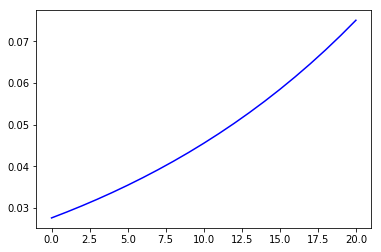

In [109]:
plot(weights,c='b');

In [110]:
ema = convolve(weights, c)[N-1:-N+1]

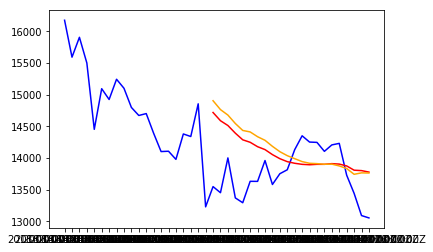

In [111]:
plot(d,c, c='b')
plot(d[N-1:], sma, c='r');
plot(d[N-1:], ema, c='orange');

### Bollinger bands

In [112]:
deviation = []
C = len(c)

for i in range(N-1, C):
    if i + N < C:
        dev = c[i:i+N]
    else:
        dev = c[-N:]
    
    averages = np.zeros(N)
    averages.fill(sma[i-N-1])
    dev = dev - averages
    dev = dev**2
    dev = np.sqrt(np.mean(dev))
    deviation.append(dev)
    
deviation = 2 * np.array(deviation)
upperBB = sma + deviation
lowerBB = sma - deviation

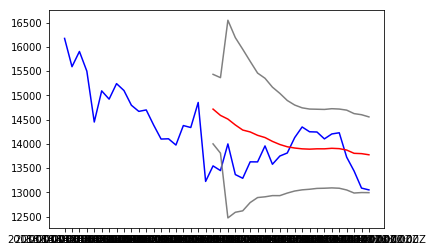

In [113]:
plot(d,c,c='b')
plot(d[N-1:],sma,c='r')
plot(d[N-1:],upperBB,c='gray')
plot(d[N-1:],lowerBB,c='gray');